#  What is a Neural Network? 
A Neural Network is a machine learning model inspired by the human brain.

It tries to learn patterns from data, just like how we learn to recognize cats, dogs, or voices.

--------

## The Basic Unit: Neuron (神经元)

The smallest unit in a neural network is called a neuron (神经元).

Each neuron does 3 things:

1. **Receives input** (接收输入): Like signals from other neurons.
2. **Multiplies each input by a weight** (权重): Some inputs are more important than others.
3. **Adds a bias** (偏置), then applies an **activation function** (激活函数), like `ReLU` or `Sigmoid`.

👉 Math formula:

$$
output = activation(w_1x_1 + w_2x_2 + ... + b)
$$

- $ w $ : weights (权重)
- $ x $ : input features (输入特征)
- $ b $ : bias (偏置)
- $ activation $ : e.g., ReLU, Sigmoid (非线性变换)

---------



## Layers: Building the Network

Neurons are organized in **layers** (层):

1. **Input Layer** (输入层): Takes raw data (e.g., pixel values).
2. **Hidden Layers** (隐藏层): Where the magic happens! These layers learn features.
3. **Output Layer** (输出层): Gives final prediction (e.g., class label).

> A network with many hidden layers is called a **Deep Neural Network** (深度神经网络) — this is where **Deep Learning** comes from!

-----------


## How Does It Learn? Trai为了在现实世界的数据上进一步理解神经网络，我们将MLPClassifier应用在乳腺癌数据
集上。首先使用默认参数ning (训练)

We train the network using data and labels.

#### Step 1: Forward Propagation(前向传播)

- Pass input through the network
- Get a prediction

#### Step 2: Compute Loss (损失计算)

- Compare prediction with true label
- Use a **loss function**, like **Cross-Entropy** (交叉熵) for classification

> Lower loss = better prediction

#### Step 3: Backpropagation (反向传播)

- Calculate how much each weight contributed to the error
- Use **gradient descent** (梯度下降) to update weights

> 💡 Think: “Which way should I change my weights to make the error smaller?”

We use **optimizer** (优化器), like **SGD** or **Adam**, to do this.

---

## Activation Functions (激活函数)

Why do we need them?

Because without activation functions, the network is just a linear model 😴  
But we want it to learn **non-linear patterns** (非线性模式)!

Common ones:

| Function | Name (中文) | Use Case |
| --- | --- | --- |
| `ReLU` | 线性整流函数 | Most common! Fast and works well |
| `Sigmoid` | S型函数 | Old-school; used in output layer for probability |
| `Tanh` | 双曲正切函数 | Like sigmoid, but centered at 0 |



# 神经网络模型
这里只讨论一些相对简单的方法，即用于分类和回归的**多层感知机**（multilayer 
perceptron，MLP），它可以作为研究更复杂的深度学习方法的起点。

**MLP也被称为（普通）前馈神经网络，有时也简称为神经网络**

MLP可以被视为广义的线性模型，执行多层处理后得到结论。
还记得线性回归的预测公式为：

```
ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b
```

简单来说，ŷ是输入特征x[0]到x[p]的加权求和，权重为学到的系数w[0]到w[p]。我们可
以将这个公式可视化，如图2-44所示

## Logistic 回归的可视化


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

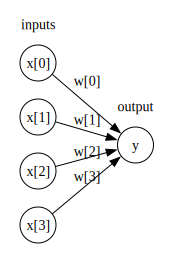

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

图中，左边的每个结点代表一个输入特征，连线代表学到的系数，右边的结点代表输出，
是输入的加权求和。

在MLP中，多次重复这个计算加权求和的过程，首先计算代表中间过程的**隐单元**（hidden 
unit），然后再计算这些隐单元的加权求和并得到最终结果（如图2-45所示）
## 单隐层的多层感知机图示

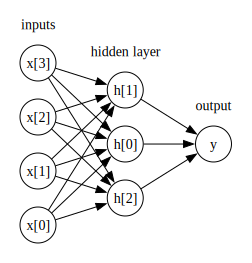

In [4]:
display(mglearn.plots.plot_single_hidden_layer_graph())

这个模型需要学习更多的系数（也叫作权重）：在每个输入与每个隐单元（隐单元组成了
隐层）之间有一个系数，在每个隐单元与输出之间也有一个系数。

从数学的角度看，计算一系列加权求和与只计算一个加权求和是完全相同的，因此，为了
让这个模型真正比线性模型更为强大，我们还需要一个技巧。

## relu函数和tanh函数图示

在计算完每个隐单元的加权求和之后，对结果再应用一个非线性函数——通常是**校正非线性**（rectifying nonlinearity，
也叫校正线性单元或relu）或**正切双曲线**（tangens hyperbolicus，tanh）。

然后将这个函数
的结果用于加权求和，计算得到输出ŷ。这两个函数的可视化效果见图2-46。

***relu截断小于0 的值，而tanh在输入值较小时接近-1，在输入值较大时接近+1***

有了这两种非线性函
数，神经网络可以学习比线性模型复杂得多的函数。

Text(0, 0.5, 'relu(x), tanh(x)')

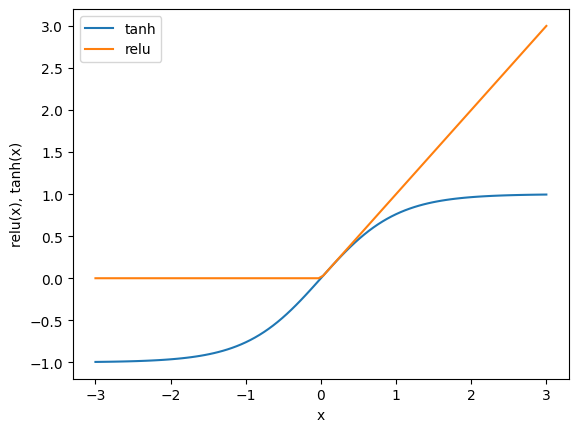

In [6]:
line = np.linspace(-3, 3, 100) 
plt.plot(line, np.tanh(line), label="tanh") 
plt.plot(line, np.maximum(line, 0), label="relu") 
plt.legend(loc="best") 
plt.xlabel("x") 
plt.ylabel("relu(x), tanh(x)")

对于图2-45所示的小型神经网络，计算回归问题的ŷ的完整公式如下（使用tanh非线
性）：
```
h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3] + b[0])

h[1] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3]+ b[1])

h[2] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3] + b[2])

ŷ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2] + b

```
其中，w是输入x与隐层h之间的权重，v是隐层h与输出ŷ之间的权重。

权重w和v要从数据中学习得到，x是输入特征，ŷ是计算得到的输出，h是计算的中间结果。

需要用户设置的一个重要参数是**隐层中的结点个数**。对于非常小或非常简单的数据集，这个值可以
小到10；对于非常复杂的数据，这个值可以大到10 000。也可以添加多个隐层，

如图2-47所示
## 有两个隐层的多层感知机

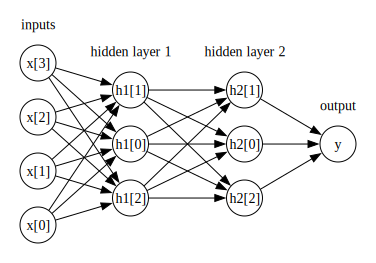

In [7]:
mglearn.plots.plot_two_hidden_layer_graph()

这些由许多计算层组成的大型神经网络，正是术语“深度学习”的灵感来源。

# 神经网络调参
我们将MLPClassifier 应用到本章前面用过的two_moons数据集上，以此研究MLP的工作
原理。
结果如图2-48所示。
## two_moons数据集
### 100个隐单元

Text(0, 0.5, 'Feature 1')

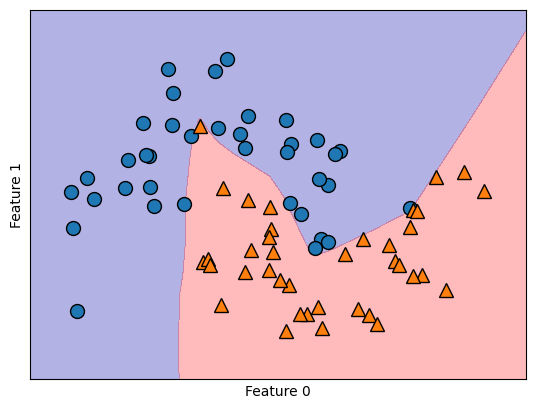

In [8]:
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import make_moons 
X, y = make_moons(n_samples=100, noise=0.25, random_state=3) 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    random_state=42) 
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train) 
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3) 
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")

如你所见，神经网络学到的决策边界完全是非线性的，但相对平滑。我们用到了
solver='lbfgs'，这一点稍后会讲到。

***默认情况下，MLP使用100个隐结点***，这对于这个小型数据集来说已经相当多了。

我们可
以减少其数量（从而降低了模型复杂度），但仍然得到很好的结果（图2-49）
### 10个隐单元

D:\Software\VR_ev\hands-on\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

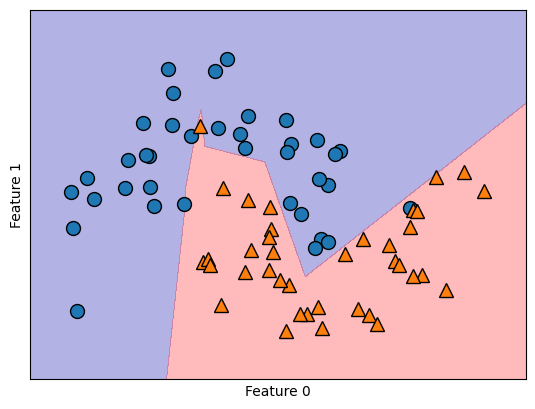

In [10]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]) 
mlp.fit(X_train, y_train) 
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3) 
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")

只有10个隐单元时，决策边界看起来更加参差不齐。默认的非线性是relu，如图2-46所
示。如果使用单隐层，那么决策函数将由10个直线段组成。

## 如果想得到更加平滑的决策边界

可以添加更多的隐单元（见图2-48）、添加第二个隐层（见图2-50）或者使用tanh非线性（见图2-51）
### **relu非线性**

Text(0, 0.5, 'Feature 1')

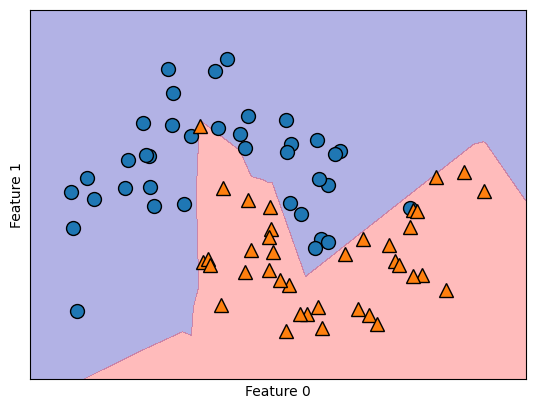

In [13]:
# 使用2个隐层，每个包含10个单元，relu非线性
mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                    hidden_layer_sizes=[10, 10]) 
mlp.fit(X_train, y_train) 
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3) 
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")

### **tanh非线性**

D:\Software\VR_ev\hands-on\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

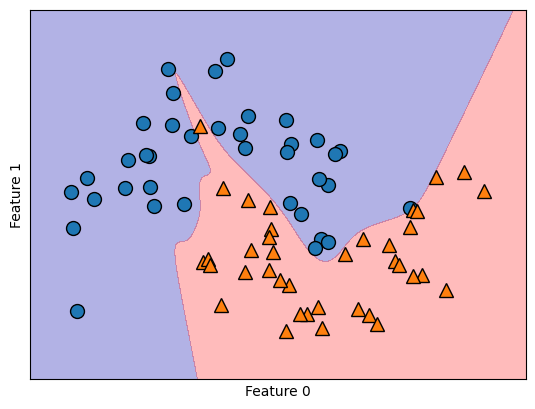

In [14]:
# 使用2个隐层，每个包含10个单元，这次使用tanh非线性 
mlp = MLPClassifier(solver='lbfgs', activation='tanh', 
                    random_state=0, hidden_layer_sizes=[10, 10]) 
mlp.fit(X_train, y_train) 
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3) 
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")

**ReLU** tends to produce sharper, more flexible boundaries useful for complex patterns;

**tanh** produces smoother, more conservative boundaries
that may generalize better on simpler problems 
— but can struggle with vanishing gradients in deeper architectures.

------

最后，我们还可以利用L2惩罚使权重趋向于0，从而控制神经网络的复杂度，正如我们在
岭回归和线性分类器中所做的那样。

**MLPClassifier中调节L2惩罚的参数是alpha**（与线
性回归模型中的相同），它的默认值很小（弱正则化）。

图2-52显示了不同alpha值对two_
 moons 数据集的影响，用的是2个隐层的神经网络，每层包含10个或100个单元：

## 不同隐单元个数与alpha参数的不同设定下的决策函数

D:\Software\VR_ev\hands-on\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Software\VR_ev\hands-on\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


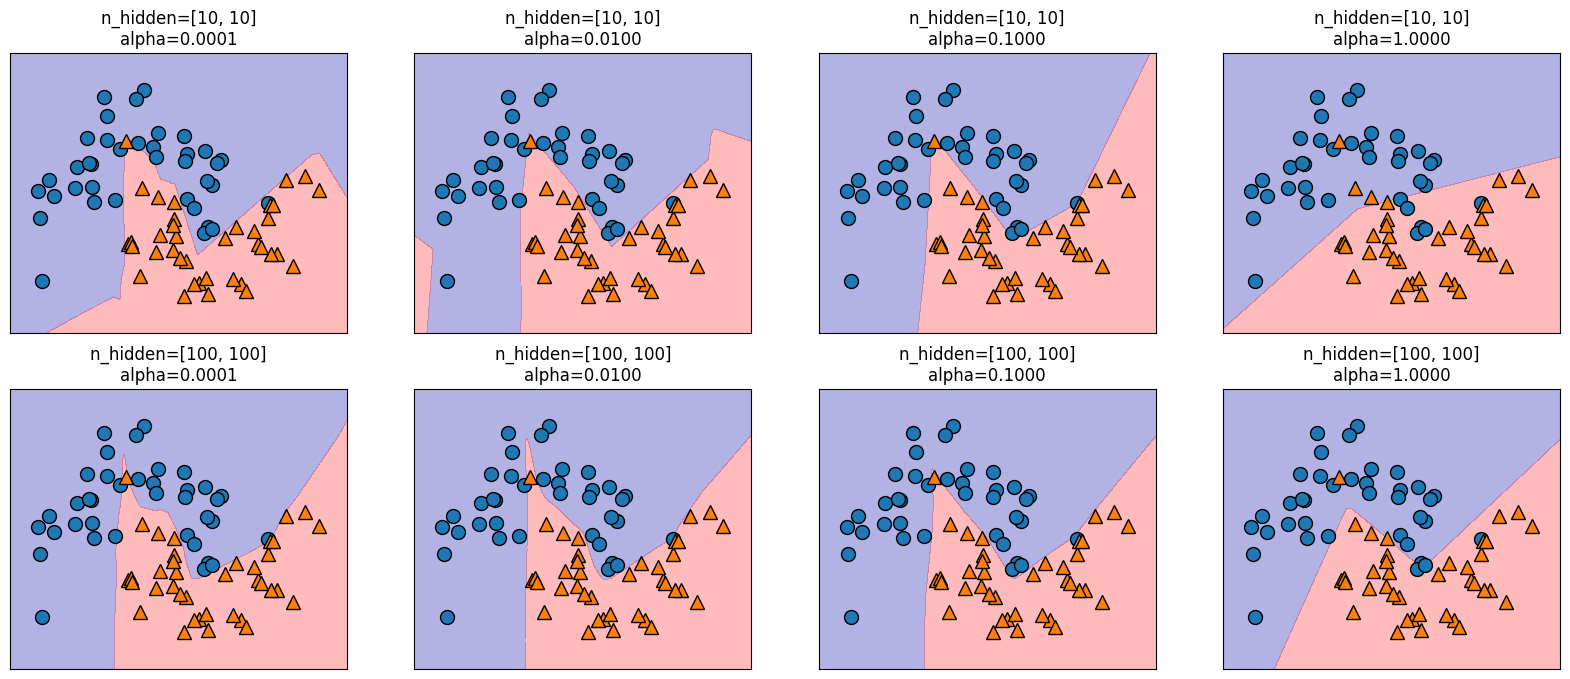

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8)) 
for axx, n_hidden_nodes in zip(axes, [10, 100]): 
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]): 
        mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], 
                            alpha=alpha) 
        mlp.fit(X_train, y_train) 
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax) 
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax) 
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format( 
                      n_hidden_nodes, n_hidden_nodes, alpha))

### 分析总结一下：

| Hyperparameter | Effect on Decision Boundary | Risk |
| --- | --- | --- |
| **Small Network** | Simpler, smoother boundaries | Underfitting |
| **Large Network** | More flexible, can fit complex shapes | Overfitting (without reg.) |
| **Low Alpha (e.g., 0.0001)** | Complex, wiggly, fits noise | Overfitting |
| **High Alpha (e.g., 1.0)** | Smooth, simple, ignores local variations | Underfitting |

---

###  **Takeaway / Best Practice**

> ✅ **Use larger networks + stronger regularization (higher alpha)** to achieve good performance without overfitting.

-----

现在你可能已经认识到了，控制神经网络复杂度的方法有很多种：

**隐层的个数**

***每个隐层中的单元个数与正则化 alpha**

实际上还有更多，但这里不再过多介绍。



## 相同参数但不同随机初始化的情况下学到的决策函数

神经网络的一个重要性质是，**在开始学习之前其权重是随机设置的，这种随机初始化会影
响学到的模型**。

也就是说，**即使使用完全相同的参数，如果随机种子不同的话，我们也可
能得到非常不一样的模型**。

如果网络很大，并且复杂度选择合理的话，那么这应该不会对
精度有太大影响，但应该记住这一点（特别是对于较小的网络）。

图2-53显示了几个模型
的图像，所有模型都使用相同的参数设置进行学习：

D:\Software\VR_ev\hands-on\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


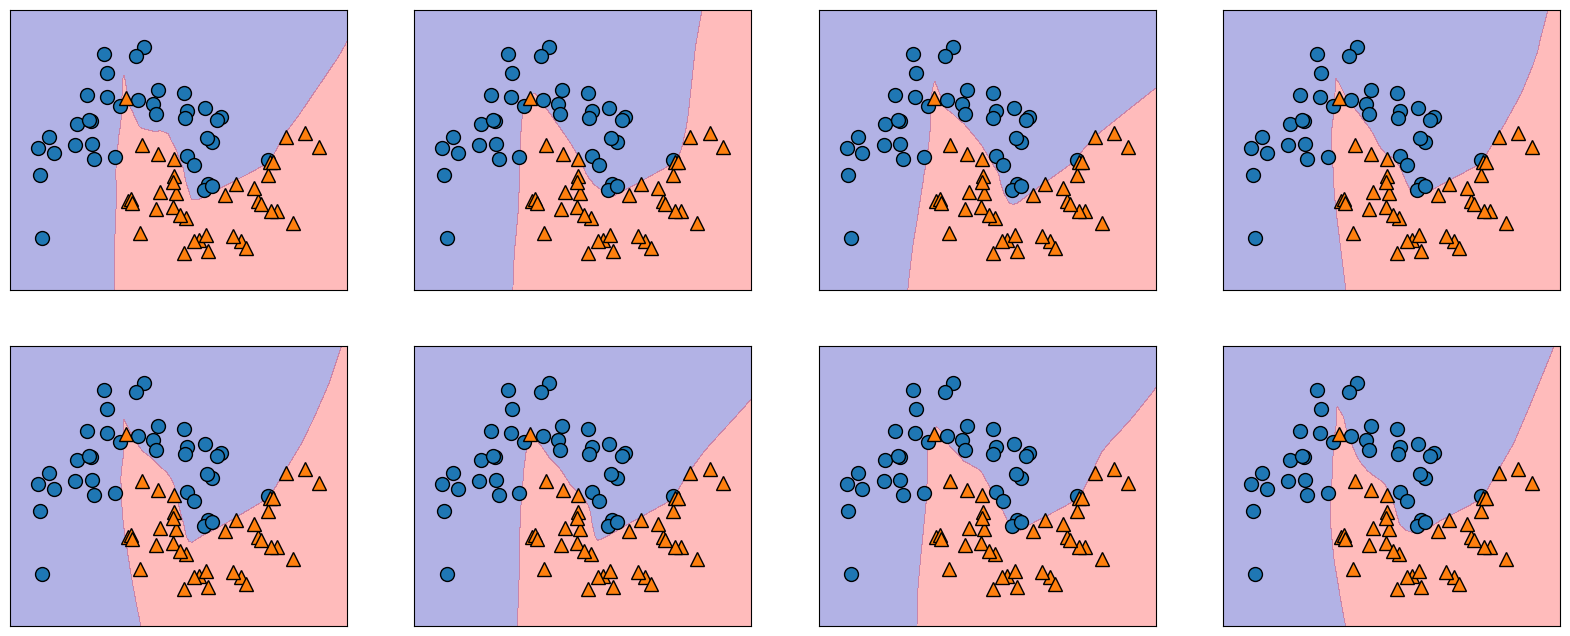

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8)) 
for i, ax in enumerate(axes.ravel()): 
    mlp = MLPClassifier(solver='lbfgs', random_state=i, 
                        hidden_layer_sizes=[100, 100]) 
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax) 
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

## Breast Cancer上看看
为了在现实世界的数据上进一步理解神经网络，我们将MLPClassifier应用在乳腺癌数据
集上。首先使用默认参数
###  Step 1: Import Libraries
###  Step 2: Load the Data

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the Data
data = load_breast_cancer()
X = data.data    # Features (输入): shape (569, 30)
y = data.target  # Labels (输出): 0 = benign, 1 = malignant

print("Feature shape:", X.shape)  # Should be (569, 30)
print("Label shape:", y.shape)    # Should be (569,)

Feature shape: (569, 30)
Label shape: (569,)


### Step 3: Split into Train and Test Sets

In [27]:
# Step 3: Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,         # Use 20% for testing
    random_state=42        # For reproducibility (可重复性)
)

### Step 4: **Standardize the Features** (Very Important!)
Neural networks are sensitive to scale.

If one feature is 0~1, another is 0~1000, the model will be confused 😵‍💫

So we use StandardScaler to make all features have:

Mean = 0

Std = 1

In [22]:
# Step 4: Standardize the Features (Very Important!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train
X_test_scaled = scaler.transform(X_test)        # Only transform test!

### Step 5: Build and Train the MLPClassifier
Now let’s create our MLP:

In [28]:
# Step 5: Build and Train the MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),      # One hidden layer with 100 neurons
    activation='relu',              # ReLU 激活函数
    solver='adam',                  # Adam optimizer (推荐！)
    max_iter=500,                   # Max epochs (迭代次数)
    alpha=0.001,                    # L2 regularization (正则化强度)
    random_state=42,                # Reproducible results
    verbose=False                   # No printing during training
)

# Train the model
mlp.fit(X_train_scaled, y_train)

,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


### Step 6: Make Predictions and Evaluate

In [30]:
#  Step 6: Make Predictions and Evaluate
# Predict on test set
y_pred = mlp.predict(X_test_scaled)

# Compute accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")  # e.g., 0.97 or 97%

Test Accuracy: 0.9737


In [31]:
# create a report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Step 7: Visualize(Training Loss Curve)
 What We CAN Visualize 

1. **Training Loss Curve** → How the model learns over time
2. **Confusion Matrix** → See where it made mistakes
3. **Feature Importance (approximate)** → Which features matter most

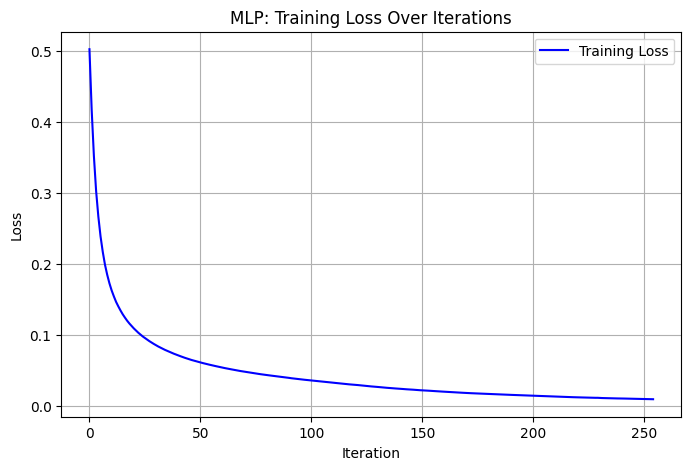

In [33]:
import matplotlib.pyplot as plt

# Train again, but this time ask for loss curve
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=500,
    alpha=0.001,
    random_state=42,
    verbose=False,
    early_stopping=False  # Keep all epochs for plotting
)

# Fit and record loss
mlp.fit(X_train_scaled, y_train)

# Plot loss vs iteration
plt.figure(figsize=(8, 5))
plt.plot(mlp.loss_curve_, label='Training Loss', color='blue')
plt.title('MLP: Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

What to look for:

The curve should go down → good!

If it stops going down → model converged (收敛了)

If it jumps up → maybe learning rate too high or data not scaled

### Training Loss Curve 补充

the **Loss Curve** is just a graph that shows:

| X-axis | Y-axis |
| --- | --- |
| Iteration (第几次训练) | Loss value (错误程度) |

👉 If the line goes down → good! The model is learning.  

👉 If it flattens out → the model has learned as much as it can.

----------
#### **What is early_stopping?**

imagine this:

> Your model keeps training… but after 200 steps, the loss stops going down.  
> It’s not getting any better — just wasting time and risking overfitting.

Wouldn’t it be nice if the model said:

> “Teacher, I’ve learned enough. Let me stop now.” ?

That’s exactly what **`early_stopping=True`** does!

-------


#### ***How `early_stopping` works***

1. It splits off a small part of the training data (called **validation set**) — usually 10%
2. After each iteration, it checks the loss on this validation set
3. If the loss doesn’t improve for several rounds (e.g., 10 times), it **stops early**

This saves time and prevents **overfitting** (过拟合)

----------

#### Examples with early_stopping


In [35]:
# Add early stopping
mlp_es = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=500,
    alpha=0.001,
    random_state=42,
    early_stopping=True,           # ← Turn ON early stopping
    validation_fraction=0.1,       # Use 10% of training data as validation
    n_iter_no_change=10            # Stop if no improvement in 10 iterations
)

# Train
mlp_es.fit(X_train_scaled, y_train)

# Compare: how many iterations did it actually use?
print("Actual iterations used:", len(mlp_es.loss_curve_))  # Maybe only 150 instead of 500!

Actual iterations used: 13


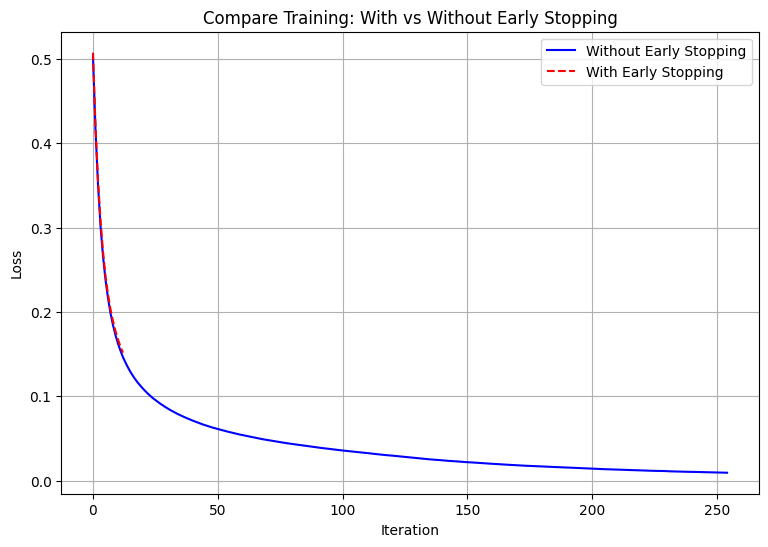

In [36]:
plt.figure(figsize=(9, 6))
plt.plot(mlp.loss_curve_, label='Without Early Stopping', color='blue')
plt.plot(mlp_es.loss_curve_, label='With Early Stopping', color='red', linestyle='--')
plt.title('Compare Training: With vs Without Early Stopping')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

So early_stopping is like a smart brake pedal

— stops when learning is done.

# pros and cons 

## Advantages

1. **Powerful for big data**  
	→ Can learn complex patterns from large datasets.
2. **Can beat other models**  
	→ If you have enough data + time + good tuning, neural nets often outperform SVM, logistic regression, etc.
3. **Works for both classification and regression**  
	→ Very flexible!


---

### ❌ Disadvantages (缺点)

1. **Training takes a long time**  
	→ Especially for big models (many layers or neurons).
2. **Need careful data preprocessing**  
	→ Like scaling features to mean=0, std=1 (very important!)
3. **Hyperparameter tuning is an art**  
	→ Choosing layers, neurons, learning rate… needs practice.
4. **Not always better than tree-based models**  
	→ ***If your data has mixed feature types (e.g., some categorical, some numeric), tree models (like Random Forest) may work better***.

> 🧠 Tip: Just like SVM, neural networks also prefer “uniform” features — all similar scale and type.

# Key Parameters to Tune

## 1\. **Number of Layers & Neurons per Layer**

- Start with 1 or 2 hidden layers.
- Each layer usually has around the same number of neurons as input features (or a bit more).
- More layers/neurons = more complex model → risk of overfitting.

--------


## 2\. **Model Complexity Estimation**

You can estimate complexity by counting **weights (parameters)**:

Example:

- Input: 100 features
- Hidden layer: 100 neurons → 100 × 100 = 10,000 weights
- Output layer: 1 neuron → 100 × 1 = 100 weights  
	→ Total ≈ 10,100 weights

Add another hidden layer?  
→ Total jumps to ~20,100 weights → much more complex!

> 💡 More weights = more power, but also more risk of memorizing training data (overfitting).


# How to Tune Your Model
The best strategy:

1. **Start big**: Build a network that’s large enough to fit the data.
2. **Then shrink or regularize**:
	- Reduce number of neurons/layers → simpler model
	- Increase `alpha` (L2 regularization) → penalizes large weights → improves generalization

---
#  Important Note: fit() Resets the Model 
In scikit-learn, when you call `.fit()` again on the same model object, it **forgets everything** it learned before.

Example:
```python
model.fit(X_train1, y_train1)  # Learns from dataset 1
model.fit(X_train2, y_train2)  # Forgets dataset 1, starts fresh!
```
✅ So if you want to reuse a trained model on new data 

→ create a new model instance.
